<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dimensionality-Reduction" data-toc-modified-id="Dimensionality-Reduction-1">Dimensionality Reduction</a></span></li><li><span><a href="#Latent-Semantic-Analysis" data-toc-modified-id="Latent-Semantic-Analysis-2">Latent Semantic Analysis</a></span></li><li><span><a href="#numpy를-이용한-cosine-similarity-계산" data-toc-modified-id="numpy를-이용한-cosine-similarity-계산-3">numpy를 이용한 cosine similarity 계산</a></span></li><li><span><a href="#SVD(Singular-Value-Decomposition)" data-toc-modified-id="SVD(Singular-Value-Decomposition)-4">SVD(Singular Value Decomposition)</a></span></li><li><span><a href="#exam1" data-toc-modified-id="exam1-5">exam1</a></span></li><li><span><a href="#Exam2" data-toc-modified-id="Exam2-6">Exam2</a></span></li><li><span><a href="#뉴스-데이터에-SVD-적용한-Clustering" data-toc-modified-id="뉴스-데이터에-SVD-적용한-Clustering-7">뉴스 데이터에 SVD 적용한 Clustering</a></span><ul class="toc-item"><li><span><a href="#패키지-import" data-toc-modified-id="패키지-import-7.1">패키지 import</a></span></li><li><span><a href="#corpus-읽어오기" data-toc-modified-id="corpus-읽어오기-7.2">corpus 읽어오기</a></span></li><li><span><a href="#lexicon-확장하기" data-toc-modified-id="lexicon-확장하기-7.3">lexicon 확장하기</a></span></li><li><span><a href="#pickle로-저장된-collection(filename,-lexicon-리스트)-가져오기" data-toc-modified-id="pickle로-저장된-collection(filename,-lexicon-리스트)-가져오기-7.4">pickle로 저장된 collection(filename, lexicon 리스트) 가져오기</a></span></li><li><span><a href="#posting-data-indexing" data-toc-modified-id="posting-data-indexing-7.5">posting data indexing</a></span></li><li><span><a href="#indexing-objects-pickle-저장" data-toc-modified-id="indexing-objects-pickle-저장-7.6">indexing objects pickle 저장</a></span></li><li><span><a href="#저장된-indexing-objects-pickle-읽어오기" data-toc-modified-id="저장된-indexing-objects-pickle-읽어오기-7.7">저장된 indexing objects pickle 읽어오기</a></span></li><li><span><a href="#SVD-함수-정의" data-toc-modified-id="SVD-함수-정의-7.8">SVD 함수 정의</a></span></li><li><span><a href="#docVector-만들기" data-toc-modified-id="docVector-만들기-7.9">docVector 만들기</a></span></li><li><span><a href="#SVD(Singluar-Vector-Decomposition)-=&gt;-U,-Sigma,-V.T" data-toc-modified-id="SVD(Singluar-Vector-Decomposition)-=>-U,-Sigma,-V.T-7.10">SVD(Singluar Vector Decomposition) =&gt; U, Sigma, V.T</a></span></li><li><span><a href="#중요도-산출-on-Latent-Semantic-Dimensions" data-toc-modified-id="중요도-산출-on-Latent-Semantic-Dimensions-7.11">중요도 산출 on Latent Semantic Dimensions</a></span></li><li><span><a href="#유사도-산출-on-Latent-Semantic-Dimensions" data-toc-modified-id="유사도-산출-on-Latent-Semantic-Dimensions-7.12">유사도 산출 on Latent Semantic Dimensions</a></span></li><li><span><a href="#군집(clustering)" data-toc-modified-id="군집(clustering)-7.13">군집(clustering)</a></span></li><li><span><a href="#wordcloud" data-toc-modified-id="wordcloud-7.14">wordcloud</a></span></li></ul></li></ul></div>

### Dimensionality Reduction

- https://opentutorials.org/module/3653/22994

![Dimensionality_Reduction.png](./images/Dimensionality_Reduction.png)

차원 축소 (Dimensionality Reduction)는 어떤 목적에 따라서 데이터의 양을 줄이는 방법입니다.

차원 축소로 데이터의 양을 일부러 줄여서 사용하는 이유는

첫째로, 데이터의 양이 줄어든다면 <br>
기본적으로 시간 복잡도 (time complexity, 계산하는 시간)와 공간 복잡도 (space complexity, 저장하는 변수의 양)가 줄어듭니다.

둘째로, 아주 많은 차원의 데이터로 학습시킨 머신러닝 모델은 내부의 파라미터도 매우 복잡하게 형성되기 때문에 (=overfit 되기가 쉽기 때문에), <br>
적은 양의 데이터에 대해서 이리 휘청 저리 휘청 불안정한 결과를 내놓게 됩니다. <br>
입력 데이터의 차원을 줄여서 학습을 시키면 모델이 비교적 간단해지고, 그러면 적은 데이터 셋에 대해 안정적(robust)인 결과를 내놓게 됩니다.
 
셋째로, 간단한 모델일수록 사람이 그 내부 구조를 이해하기에 편하고 (interpretable), <br>
모델이 내놓은 결과를 2차원이나 3차원의 그림으로 축소해 드러내어서, 사람이 결과를 알아보기에 편합니다. 

차원축소 방법은, 원본 데이터를 훼손하는 것이므로 있던 정보를 일부 없애버리게 됩니다.<br>
어떤 목적 아래에서 어떤 정보를 얼만큼 없애면 좋을까에 대한 고민과 그 결과가 차원축소 방법입니다.

그림은 총 세 파트로 나뉘어 있습니다.<br>
우상단의 분홍색 배경에는 데이터를 표현해 놓았습니다.

차원축소를 하는 방식에는 크게 두 가지가 있는데요,<br>
상단의 짙은 회색 배경에는 feature selection 방법을 그려놓았습니다.<br>
하단의 옅은 회색 배경에는 feature extraction 방법을 그려놓았습니다.

### Latent Semantic Analysis

- https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/

잠재의미분석이란 단어-문서행렬(Word-Document Matrix), 단어-문맥행렬(window based co-occurrence matrix) 등 입력 데이터에 특이값 분해를 수행해 데이터의 차원수를 줄여 계산 효율성을 키우는 한편 행간에 숨어있는(latent) 의미를 이끌어내기 위한 방법론입니다.

잠재의미분석을 수행하는 절차는 이렇습니다. 

n개의 문서를 m개의 단어로 표현된 입력데이터 행렬 A가 주어졌다고 칩시다. 

A의 0보다 큰 고유값의 개수를 r이라고 할 때, r보다 작은 k를 연구자가 임의로 설정하고 $\Sigma_k$를 만듭니다. <br>
이후 $U$와 $V$행렬에서 여기에 대응하는 부분만 남겨 $U_k$와 $V_k$를 만들어줍니다. <br>
이렇게 되면 $A$와 비슷한 $A_k$ 행렬을 구축할 수 있습니다.

$A_k = U_k \Sigma_k V_t^T$

![LSA](./images/LSA.png)

위 식 양변에 $U_k$의 전치행렬을 곱해준 것을 $X_1$, $V_k$를 곱해준 것을 $X_2$라고 둡니다. <br>
그러면 $X_1$의 경우 n개의 문서는 원래 단어수 m보다 훨씬 작은 k개 변수로 표현된 결과가 됩니다. <br>
$X_2$는 m개의 단어가 원래 문서 수 n보다 작은 k개 변수로 표현한 결과입니다. 

이는 주성분 분석에서의 차원축소 효과와 비슷한 것으로 이해하면 좋을 것 같습니다.

$U^T_k A_k = U^T_k U_k \Sigma_k V^T_k = I \Sigma_k V^T_k = \Sigma_k V^T_k = X_1$

$A_k V_k = U_k \Sigma_k V^T_k V_k = U_k \Sigma_k I = U_k \Sigma_k = X_2$


### numpy를 이용한 cosine similarity 계산

In [1]:
import numpy as np

In [7]:
X = np.array([[1, 1, 0, 0, 0],
                    [0, 1, 0, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 1]])

In [28]:
X, X.shape, X.ndim
# Term-Document Matric
# Row: Terms
# Column: Documents

# Document-Term Matrix
# Row: Documrnts
# Column: Terms

(array([[1, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]]), (5, 5), 2)

In [22]:
X.T

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [33]:
_X = X.dot(X.T)
_X

array([[2, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [27]:
np.matmul(X, X.T)

array([[2, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [36]:
def cosine(x, y):
    return inner_product(x, y) / (len(x)*len(y))     # len(x), len(y) : norm

def inner_product(x, y):
    return x * y

In [34]:
np.linalg.norm(X[0])

1.4142135623730951

In [35]:
np.linalg.norm(X, axis=1)    # 행의 길이 : 문서의 길이

array([1.41421356, 1.        , 1.        , 1.        , 1.        ])

In [39]:
np.linalg.norm(X.T, axis=0)    # 열의 길이 : term의 길이

array([1.41421356, 1.        , 1.        , 1.        , 1.        ])

In [44]:
# cosine similarity
X.dot(X.T) / np.linalg.norm(X, axis=1).reshape(5, 1)  * np.linalg.norm(X.T, axis=0)

array([[2.        , 0.70710678, 0.        , 0.        , 0.        ],
       [1.41421356, 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

### SVD(Singular Value Decomposition)

특이값분해는 m x n 크기의 데이터 행렬 $A$를 아래와 같이 분해하는 걸 말합니다.

![SVD](./images/SVD.png)

- $SVD: C = UΣV^T$ (where C = term-document matrix)

![lsi](./images/LSI.png)

In [2]:
import pandas as pd

In [85]:
words = ["ship", "boat", "ocean", "wood", "tree"]
documents = ["d1", "d2", "d3", "d4", "d5", "d6"]

In [154]:
C = np.array([[1, 0, 1, 0, 0, 0],
              [0, 1, 0, 0, 0, 0],
              [1, 1, 0, 0, 0, 0],
              [1, 0, 0, 1, 1, 0],
              [0, 0, 0, 1, 0, 1]    
])

In [93]:
pd.DataFrame(C, index=words, columns=documents)

,d1,d2,d3,d4,d5,d6
ship,1,0,1,0,0,0
boat,0,1,0,0,0,0
ocean,1,1,0,0,0,0
wood,1,0,0,1,1,0
tree,0,0,0,1,0,1


In [57]:
# C: M x N
# U: M x K
# sigma: K, K   => K = min(M, N)  => 5: (클러스터의 수 또는 잠재의미의 수)
# VT: K, N
U, sigma, VT = np.linalg.svd(C, full_matrices=False)

In [91]:
pd.DataFrame(U, index=words)

,0,1,2,3,4
ship,0.440347,-0.296174,-0.569498,5.773503e-01,-0.246402
boat,0.129346,-0.331451,0.587022,9.436896e-16,-0.727197
ocean,0.475530,-0.511115,0.367690,4.518514e-16,0.614358
wood,0.703020,0.350572,-0.154906,-5.773503e-01,-0.159788
tree,0.262673,0.646747,0.414592,5.773503e-01,0.086614


In [79]:
sigma   # Latent Semantic => U x sigma: Term의 중요도,     sigma x VT: Document의 중요도

array([2.16250096, 1.59438237, 1.27529025, 1.        , 0.39391525])

In [92]:
_sigma = np.diag(sigma)
pd.DataFrame(_sigma)

,0,1,2,3,4
0,2.162501,0.000000,0.00000,0.0,0.000000
1,0.000000,1.594382,0.00000,0.0,0.000000
2,0.000000,0.000000,1.27529,0.0,0.000000
3,0.000000,0.000000,0.00000,1.0,0.000000
4,0.000000,0.000000,0.00000,0.0,0.393915


In [94]:
pd.DataFrame(VT, columns=documents)

,d1,d2,d3,d4,d5,d6
0,7.486230e-01,2.797116e-01,0.203629,4.465631e-01,0.325096,0.121467
1,-2.864540e-01,-5.284591e-01,-0.185761,6.255207e-01,0.219880,0.405641
2,-2.797116e-01,7.486230e-01,-0.446563,2.036288e-01,-0.121467,0.325096
3,-4.162907e-16,1.066959e-15,0.577350,2.382035e-16,-0.577350,0.577350
4,5.284591e-01,-2.864540e-01,-0.625521,-1.857612e-01,-0.405641,0.219880


In [99]:
# C = UΣVT
pd.DataFrame(U.dot(_sigma).dot(VT), index=words, columns=documents)

,d1,d2,d3,d4,d5,d6
ship,1.000000e+00,2.866176e-16,1.000000e+00,-2.957499e-16,1.371194e-16,-3.707870e-16
boat,-5.863986e-17,1.000000e+00,-1.655668e-16,1.602963e-16,7.954781e-17,-4.819879e-17
ocean,1.000000e+00,1.000000e+00,-5.924052e-16,-5.787719e-17,1.733548e-17,-1.454892e-16
wood,1.000000e+00,6.760135e-17,-1.334818e-16,1.000000e+00,1.000000e+00,2.535997e-16
tree,-3.275686e-16,-5.436625e-16,-4.857263e-16,1.000000e+00,2.091058e-16,1.000000e+00


In [100]:
# C와 동일하지는 않지만, 거의 유사함
pd.DataFrame(np.round(U.dot(_sigma).dot(VT)), index=words, columns=documents)

,d1,d2,d3,d4,d5,d6
ship,1.0,0.0,1.0,-0.0,0.0,-0.0
boat,-0.0,1.0,-0.0,0.0,0.0,-0.0
ocean,1.0,1.0,-0.0,-0.0,0.0,-0.0
wood,1.0,0.0,-0.0,1.0,1.0,0.0
tree,-0.0,-0.0,-0.0,1.0,0.0,1.0


In [108]:
# U x sigma: latent semantic(sigma) 차원에서 Term의 중요도(reduced matrix)
pd.DataFrame(U.dot(_sigma), index=words)

,0,1,2,3,4
ship,0.952252,-0.472215,-0.726275,5.773503e-01,-0.097062
boat,0.279712,-0.528459,0.748623,9.436896e-16,-0.286454
ocean,1.028335,-0.814913,0.468911,4.518514e-16,0.242005
wood,1.520282,0.558946,-0.197550,-5.773503e-01,-0.062943
tree,0.568030,1.031162,0.528725,5.773503e-01,0.034119


In [109]:
# sigma x VT: latent semantic(sigma) 차원에서 Document의 중요도(reduced matrix)
pd.DataFrame(_sigma.dot(VT), index=words, columns=documents)

,d1,d2,d3,d4,d5,d6
ship,1.618898e+00,6.048766e-01,0.440347,9.656932e-01,0.703020,0.262673
boat,-4.567172e-01,-8.425659e-01,-0.296174,9.973192e-01,0.350572,0.646747
ocean,-3.567135e-01,9.547117e-01,-0.569498,2.596858e-01,-0.154906,0.414592
wood,-4.162907e-16,1.066959e-15,0.577350,2.382035e-16,-0.577350,0.577350
tree,2.081681e-01,-1.128386e-01,-0.246402,-7.317416e-02,-0.159788,0.086614


In [148]:
# Latent Sematic 차원에서의 Term의 cosine similarity
_U = U.dot(np.diag(sigma))
cos_sim_U = _U.dot(_U.T) / (np.linalg.norm(_U, axis=1).reshape(5,1) * np.linalg.norm(_U.T, axis=0))
pd.DataFrame(np.round(cos_sim_U*100), index=words, columns=words)

,ship,boat,ocean,wood,tree
ship,100.0,-0.0,50.0,41.0,-0.0
boat,-0.0,100.0,71.0,-0.0,-0.0
ocean,50.0,71.0,100.0,41.0,-0.0
wood,41.0,-0.0,41.0,100.0,41.0
tree,-0.0,-0.0,-0.0,41.0,100.0


In [149]:
# Latent Sematic 차원에서의 document의 cosine similarity
_V = np.diag(sigma).dot(VT)
cos_sim_V = _V.T.dot(_V) / (np.linalg.norm(_V.T, axis=1).reshape(6,1) * np.linalg.norm(_V, axis=0))
pd.DataFrame(np.round(cos_sim_V*100), index=documents, columns=documents)

,d1,d2,d3,d4,d5,d6
d1,100.0,41.0,58.0,41.0,58.0,-0.0
d2,41.0,100.0,-0.0,-0.0,0.0,-0.0
d3,58.0,-0.0,100.0,-0.0,-0.0,-0.0
d4,41.0,-0.0,-0.0,100.0,71.0,71.0
d5,58.0,0.0,-0.0,71.0,100.0,0.0
d6,-0.0,-0.0,-0.0,71.0,0.0,100.0


In [161]:
_U = U[:, :2].dot(_sigma[:2])    # 차원 축소
cos_sim_U = _U.dot(_U.T) / (np.linalg.norm(_U, axis=1).reshape(5,1) * np.linalg.norm(_U.T, axis=0))
pd.DataFrame(cos_sim_U, index=words, columns=words)

,ship,boat,ocean,wood,tree
ship,1.000000,0.811764,0.978079,0.687557,0.043137
boat,0.811764,1.000000,0.915575,0.134084,-0.548426
ocean,0.978079,0.915575,1.000000,0.521280,-0.165849
wood,0.687557,0.134084,0.521280,1.000000,0.755113
tree,0.043137,-0.548426,-0.165849,0.755113,1.000000


In [163]:
cluster = pd.DataFrame(cos_sim_U, index=words)
temp = cluster.sort_values(by=[1], ascending=False)
temp[temp[1] > 0][1].to_dict()

{'boat': 1.0,
 'ocean': 0.9155748759872768,
 'ship': 0.8117637410018149,
 'wood': 0.13408431998247014}

In [164]:
temp = cluster.sort_values(by=[0], ascending=False)
temp[temp[0] > 0][0].to_dict()

{'ship': 1.0000000000000002,
 'ocean': 0.9780790149520933,
 'boat': 0.8117637410018149,
 'wood': 0.6875573362073368,
 'tree': 0.043136502613820224}

### exam1

1. SVD => U, Sigma, Vt => (N, M), N개의 문서와 M개의 단어
2. U.Sigma : U[:, :K].Sigma[:K] => Latent Semantic 차원에서 어느 문서가 중요한지
3. Sigma.Vt : Sigma[:, :K].Vt[:K, :] => Lagent Semantic 차원에서 어느 단어가 중요한지
4. 2-> 각 문서가 어느 문서와 유사한지 (on Latent Semantic Dimensions)
5. 3-> 각 단어가 어느 단어와 유사한지 (on Latent Semantic Dimensions)

In [174]:
C = np.array([
    [1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 1, 0, 0],
    [1, 0, 1, 0, 1, 1, 1]
])

In [178]:
doc = ["A", "B", "C", "D", "E", "F"]
term = ["cute", "kitty", "eat", "rice", "cake", "hamster", "bread"]

In [204]:
pd.DataFrame(C, index=doc, columns=term)

,cute,kitty,eat,rice,cake,hamster,bread
A,1,1,0,0,0,0,0
B,0,0,1,1,1,0,0
C,0,1,0,0,0,1,0
D,0,0,1,0,0,0,1
E,0,0,0,1,1,0,0
F,1,0,1,0,1,1,1


In [205]:
U, sigma, VT = np.linalg.svd(C, full_matrices=False)
U.shape, sigma.shape, VT.shape

((6, 6), (6,), (6, 7))

In [207]:
_sigma = np.diag(sigma)
pd.DataFrame(_sigma)

,0,1,2,3,4,5
0,2.822643,0.00000,0.000000,0.0,0.000000,0.000000
1,0.000000,1.89393,0.000000,0.0,0.000000,0.000000
2,0.000000,0.00000,1.562689,0.0,0.000000,0.000000
3,0.000000,0.00000,0.000000,1.0,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.0,0.899362,0.000000
5,0.000000,0.00000,0.000000,0.0,0.000000,0.441438


In [224]:
_U = U[:, :2].dot(_sigma[:2])
_U

array([[ 0.4185015 , -0.91368177,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.34429039,  0.94566246,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.4185015 , -0.91368177,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.92201403, -0.07999361,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.79892052,  0.85384019,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.07882785, -0.53630501,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [225]:
pd.DataFrame(U[:, :2].dot(_sigma[:2]), index=doc)

,0,1,2,3,4,5
A,0.418502,-0.913682,0.0,0.0,0.0,0.0
B,1.344290,0.945662,0.0,0.0,0.0,0.0
C,0.418502,-0.913682,0.0,0.0,0.0,0.0
D,0.922014,-0.079994,0.0,0.0,0.0,0.0
E,0.798921,0.853840,0.0,0.0,0.0,0.0
F,2.078828,-0.536305,0.0,0.0,0.0,0.0


In [227]:
_V = _sigma[:, :2].dot(VT[:2, :])
_V

array([[ 0.88474861,  0.29653167,  1.53938435,  0.75929227,  1.49577504,
         0.88474861,  1.06313197],
       [-0.76559676, -0.96485267,  0.17390496,  0.95014204,  0.66697161,
        -0.76559676, -0.32540726],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [228]:
pd.DataFrame(_sigma[:, :2].dot(VT[:2, :]), columns=term)

,cute,kitty,eat,rice,cake,hamster,bread
0,0.884749,0.296532,1.539384,0.759292,1.495775,0.884749,1.063132
1,-0.765597,-0.964853,0.173905,0.950142,0.666972,-0.765597,-0.325407
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [229]:
# Latent Sematic 차원에서의 Document의 cosine similarity
cos_sim_U = _U.dot(_U.T) / (np.linalg.norm(_U, axis=1).reshape(6,1) * np.linalg.norm(_U.T, axis=0))
pd.DataFrame(np.round(cos_sim_U*100), index=doc, columns=doc)

,A,B,C,D,E,F
A,100.0,-18.0,100.0,49.0,-38.0,63.0
B,-18.0,100.0,-18.0,77.0,98.0,65.0
C,100.0,-18.0,100.0,49.0,-38.0,63.0
D,49.0,77.0,49.0,100.0,62.0,99.0
E,-38.0,98.0,-38.0,62.0,100.0,48.0
F,63.0,65.0,63.0,99.0,48.0,100.0


In [230]:
# Latent Sematic 차원에서의 Term의 cosine similarity
cos_sim_V = _V.T.dot(_V) / (np.linalg.norm(_V.T, axis=1).reshape(7,1) * np.linalg.norm(_V, axis=0))
pd.DataFrame(np.round(cos_sim_V*100), columns=term, index=term)

,cute,kitty,eat,rice,cake,hamster,bread
cute,100.0,85.0,68.0,-4.0,42.0,100.0,91.0
kitty,85.0,100.0,18.0,-56.0,-12.0,85.0,56.0
eat,68.0,18.0,100.0,71.0,95.0,68.0,92.0
rice,-4.0,-56.0,71.0,100.0,89.0,-4.0,37.0
cake,42.0,-12.0,95.0,89.0,100.0,42.0,75.0
hamster,100.0,85.0,68.0,-4.0,42.0,100.0,91.0
bread,91.0,56.0,92.0,37.0,75.0,91.0,100.0


In [238]:
cluster = pd.DataFrame(cos_sim_U, index=doc)
cluster

,0,1,2,3,4,5
A,1.000000,-0.182501,1.000000,0.493458,-0.379352,0.630345
B,-0.182501,1.000000,-0.182501,0.765105,0.978945,0.648239
C,1.000000,-0.182501,1.000000,0.493458,-0.379352,0.630345
D,0.493458,0.765105,0.493458,1.000000,0.617561,0.986264
E,-0.379352,0.978945,-0.379352,0.617561,1.000000,0.479164
F,0.630345,0.648239,0.630345,0.986264,0.479164,1.000000


In [239]:
temp = cluster.sort_values(by=[1], ascending=False)     # 0번째는 모든 문서에 다 포함되는 중요하지 않은 정보이므로, 1번째를 기준으로 정렬
temp

,0,1,2,3,4,5
B,-0.182501,1.000000,-0.182501,0.765105,0.978945,0.648239
E,-0.379352,0.978945,-0.379352,0.617561,1.000000,0.479164
D,0.493458,0.765105,0.493458,1.000000,0.617561,0.986264
F,0.630345,0.648239,0.630345,0.986264,0.479164,1.000000
C,1.000000,-0.182501,1.000000,0.493458,-0.379352,0.630345
A,1.000000,-0.182501,1.000000,0.493458,-0.379352,0.630345


In [240]:
temp[temp[1] > 0][1].to_dict()

{'B': 1.0000000000000002,
 'E': 0.9789454660748421,
 'D': 0.7651054648220396,
 'F': 0.6482386350719546}

In [241]:
temp = cluster.sort_values(by=[0], ascending=False)  # 0번째를 기준으로 정렬하는 경우 의미 있는 순위를 찾기 어려움
temp

,0,1,2,3,4,5
A,1.000000,-0.182501,1.000000,0.493458,-0.379352,0.630345
C,1.000000,-0.182501,1.000000,0.493458,-0.379352,0.630345
F,0.630345,0.648239,0.630345,0.986264,0.479164,1.000000
D,0.493458,0.765105,0.493458,1.000000,0.617561,0.986264
B,-0.182501,1.000000,-0.182501,0.765105,0.978945,0.648239
E,-0.379352,0.978945,-0.379352,0.617561,1.000000,0.479164


In [242]:
temp[temp[0] > 0][0].to_dict()

{'A': 0.9999999999999998,
 'C': 0.9999999999999998,
 'F': 0.6303451754109326,
 'D': 0.49345847594937386}

In [244]:
cluster = pd.DataFrame(cos_sim_V, columns=term)
cluster

,cute,kitty,eat,rice,cake,hamster,bread
0,1.000000,0.847627,0.677955,-0.039102,0.424155,1.000000,0.914593
1,0.847627,1.000000,0.184613,-0.563331,-0.120974,0.847627,0.560674
2,0.677955,0.184613,1.000000,0.708032,0.953260,0.677955,0.917311
3,-0.039102,-0.563331,0.708032,1.000000,0.888312,-0.039102,0.368305
4,0.424155,-0.120974,0.953260,0.888312,1.000000,0.424155,0.754128
5,1.000000,0.847627,0.677955,-0.039102,0.424155,1.000000,0.914593
6,0.914593,0.560674,0.917311,0.368305,0.754128,0.914593,1.000000


In [249]:
temp = cluster.sort_values(by=[1], axis=1, ascending=False)
temp.T

,0,1,2,3,4,5,6
kitty,0.847627,1.000000,0.184613,-0.563331,-0.120974,0.847627,0.560674
hamster,1.000000,0.847627,0.677955,-0.039102,0.424155,1.000000,0.914593
cute,1.000000,0.847627,0.677955,-0.039102,0.424155,1.000000,0.914593
bread,0.914593,0.560674,0.917311,0.368305,0.754128,0.914593,1.000000
eat,0.677955,0.184613,1.000000,0.708032,0.953260,0.677955,0.917311
cake,0.424155,-0.120974,0.953260,0.888312,1.000000,0.424155,0.754128
rice,-0.039102,-0.563331,0.708032,1.000000,0.888312,-0.039102,0.368305


In [251]:
temp.T[temp.T[1] > 0][1].to_dict()

{'kitty': 1.0000000000000002,
 'hamster': 0.8476267357426155,
 'cute': 0.8476267357426152,
 'bread': 0.560674315082687,
 'eat': 0.18461264781848385}

### Exam2

In [3]:
A = [
    [1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 1],
]

In [4]:
doc = ["문서1", "문서2", "문서3", "문서4", "문서5", "문서6"]
term = ["cosmonaut", "astronaut", "moon", "car", "truck"]

In [5]:
pd.DataFrame(A, columns=doc, index=term)

,문서1,문서2,문서3,문서4,문서5,문서6
cosmonaut,1,0,1,0,0,0
astronaut,0,1,0,0,0,0
moon,1,1,0,0,0,0
car,1,0,0,1,1,0
truck,0,0,0,1,0,1


In [6]:
U, sigma, VT = np.linalg.svd(A, full_matrices=False)
U.shape, sigma.shape, VT.shape

((5, 5), (5,), (5, 6))

In [7]:
_sigma = np.diag(sigma)
pd.DataFrame(_sigma)

,0,1,2,3,4
0,2.162501,0.000000,0.00000,0.0,0.000000
1,0.000000,1.594382,0.00000,0.0,0.000000
2,0.000000,0.000000,1.27529,0.0,0.000000
3,0.000000,0.000000,0.00000,1.0,0.000000
4,0.000000,0.000000,0.00000,0.0,0.393915


In [30]:
# _U = U[:, :2].dot(_sigma[:2])
# pd.DataFrame(U[:, :2].dot(_sigma[:2]), index=term)

_U = U.dot(_sigma)
pd.DataFrame(U.dot(_sigma), index=term)

,0,1,2,3,4
cosmonaut,0.952252,-0.472215,-0.726275,5.773503e-01,-0.097062
astronaut,0.279712,-0.528459,0.748623,9.436896e-16,-0.286454
moon,1.028335,-0.814913,0.468911,4.518514e-16,0.242005
car,1.520282,0.558946,-0.197550,-5.773503e-01,-0.062943
truck,0.568030,1.031162,0.528725,5.773503e-01,0.034119


In [31]:
# _V = _sigma[:, :2].dot(VT[:2, :])
# pd.DataFrame(_sigma[:, :2].dot(VT[:2, :]), columns=doc)

_V = _sigma.dot(VT)
pd.DataFrame(_sigma.dot(VT), columns=doc)

,문서1,문서2,문서3,문서4,문서5,문서6
0,1.618898e+00,6.048766e-01,0.440347,9.656932e-01,0.703020,0.262673
1,-4.567172e-01,-8.425659e-01,-0.296174,9.973192e-01,0.350572,0.646747
2,-3.567135e-01,9.547117e-01,-0.569498,2.596858e-01,-0.154906,0.414592
3,-4.162907e-16,1.066959e-15,0.577350,2.382035e-16,-0.577350,0.577350
4,2.081681e-01,-1.128386e-01,-0.246402,-7.317416e-02,-0.159788,0.086614


In [32]:
# Latent Sematic 차원에서의 Term의 cosine similarity
cos_sim_U = _U.dot(_U.T) / (np.linalg.norm(_U, axis=1).reshape(5,1) * np.linalg.norm(_U.T, axis=0))
pd.DataFrame(cos_sim_U, index=term, columns=term)

,cosmonaut,astronaut,moon,car,truck
cosmonaut,1.000000e+00,-8.003345e-17,5.000000e-01,4.082483e-01,-4.413419e-16
astronaut,-8.003345e-17,1.000000e+00,7.071068e-01,-7.507526e-17,-5.039740e-16
moon,5.000000e-01,7.071068e-01,1.000000e+00,4.082483e-01,-5.870100e-16
car,4.082483e-01,-7.507526e-17,4.082483e-01,1.000000e+00,4.082483e-01
truck,-4.413419e-16,-5.039740e-16,-5.870100e-16,4.082483e-01,1.000000e+00


In [33]:
# Latent Sematic 차원에서의 Document의 cosine similarity
cos_sim_V = _V.T.dot(_V) / (np.linalg.norm(_V.T, axis=1).reshape(6,1) * np.linalg.norm(_V, axis=0))
pd.DataFrame(cos_sim_V, columns=doc, index=doc)

,문서1,문서2,문서3,문서4,문서5,문서6
문서1,1.000000e+00,4.082483e-01,5.773503e-01,4.082483e-01,5.773503e-01,-2.963221e-16
문서2,4.082483e-01,1.000000e+00,-6.043585e-16,-3.191787e-17,1.958219e-16,-3.068408e-16
문서3,5.773503e-01,-6.043585e-16,1.000000e+00,-7.827190e-16,-2.512096e-16,-6.821001e-16
문서4,4.082483e-01,-3.191787e-17,-7.827190e-16,1.000000e+00,7.071068e-01,7.071068e-01
문서5,5.773503e-01,1.958219e-16,-2.512096e-16,7.071068e-01,1.000000e+00,1.483248e-16
문서6,-2.963221e-16,-3.068408e-16,-6.821001e-16,7.071068e-01,1.483248e-16,1.000000e+00


In [48]:
cluster = pd.DataFrame(cos_sim_U, columns=term)
cluster

,cosmonaut,astronaut,moon,car,truck
0,1.000000e+00,-8.003345e-17,5.000000e-01,4.082483e-01,-4.413419e-16
1,-8.003345e-17,1.000000e+00,7.071068e-01,-7.507526e-17,-5.039740e-16
2,5.000000e-01,7.071068e-01,1.000000e+00,4.082483e-01,-5.870100e-16
3,4.082483e-01,-7.507526e-17,4.082483e-01,1.000000e+00,4.082483e-01
4,-4.413419e-16,-5.039740e-16,-5.870100e-16,4.082483e-01,1.000000e+00


In [49]:
temp = cluster.sort_values(by=[1], axis=1, ascending=False)
temp.T

,0,1,2,3,4
astronaut,-8.003345e-17,1.000000e+00,7.071068e-01,-7.507526e-17,-5.039740e-16
moon,5.000000e-01,7.071068e-01,1.000000e+00,4.082483e-01,-5.870100e-16
car,4.082483e-01,-7.507526e-17,4.082483e-01,1.000000e+00,4.082483e-01
cosmonaut,1.000000e+00,-8.003345e-17,5.000000e-01,4.082483e-01,-4.413419e-16
truck,-4.413419e-16,-5.039740e-16,-5.870100e-16,4.082483e-01,1.000000e+00


In [50]:
temp.T[temp.T[1] > 0][1].to_dict()    # astronaut와 moon가 유사하게 분석되었음(우주비행사.... 달...)

{'astronaut': 0.9999999999999999, 'moon': 0.7071067811865471}

In [61]:
cluster = pd.DataFrame(cos_sim_V, columns=doc)
cluster

,문서1,문서2,문서3,문서4,문서5,문서6
0,1.000000e+00,4.082483e-01,5.773503e-01,4.082483e-01,5.773503e-01,-2.963221e-16
1,4.082483e-01,1.000000e+00,-6.043585e-16,-3.191787e-17,1.958219e-16,-3.068408e-16
2,5.773503e-01,-6.043585e-16,1.000000e+00,-7.827190e-16,-2.512096e-16,-6.821001e-16
3,4.082483e-01,-3.191787e-17,-7.827190e-16,1.000000e+00,7.071068e-01,7.071068e-01
4,5.773503e-01,1.958219e-16,-2.512096e-16,7.071068e-01,1.000000e+00,1.483248e-16
5,-2.963221e-16,-3.068408e-16,-6.821001e-16,7.071068e-01,1.483248e-16,1.000000e+00


In [64]:
temp = cluster.T.sort_values(by=[1], axis=0, ascending=False)
temp

,0,1,2,3,4,5
문서2,4.082483e-01,1.000000e+00,-6.043585e-16,-3.191787e-17,1.958219e-16,-3.068408e-16
문서1,1.000000e+00,4.082483e-01,5.773503e-01,4.082483e-01,5.773503e-01,-2.963221e-16
문서5,5.773503e-01,1.958219e-16,-2.512096e-16,7.071068e-01,1.000000e+00,1.483248e-16
문서4,4.082483e-01,-3.191787e-17,-7.827190e-16,1.000000e+00,7.071068e-01,7.071068e-01
문서6,-2.963221e-16,-3.068408e-16,-6.821001e-16,7.071068e-01,1.483248e-16,1.000000e+00
문서3,5.773503e-01,-6.043585e-16,1.000000e+00,-7.827190e-16,-2.512096e-16,-6.821001e-16


In [67]:
temp[temp[1] > 0][1].to_dict()    # 문서5가 문서1, 문서2와 유사하게 분석된 것은 좀 이상함 ??? 

{'문서2': 1.0000000000000002,
 '문서1': 0.40824829046386313,
 '문서5': 1.958218726598256e-16}

### 뉴스 데이터에 SVD 적용한 Clustering

- 전처리 과정에서 명사만 선택 : [for _ in Kkma().pos(coupus) if _[1].startswith("n") if _[0] > 1]

#### 패키지 import

In [1]:
import pickle
import os
import numpy as np
import pandas as pd

In [2]:
from functions.naver import NewsScraping

from functions.info_retrieval import max_tf, raw_idf
from functions.info_retrieval import smoothig_idf
from functions.info_retrieval import clean_collection
from functions.info_retrieval import extend_lexicon    # get_extended_lexicon으로 대체됨
from functions.info_retrieval import get_extended_lexicon
from functions.info_retrieval import inverted_index_with_tf
from functions.info_retrieval import get_tdm_from_dtm
from functions.info_retrieval import tdm2twm
from functions.info_retrieval import evaluate_idf
from functions.info_retrieval import save_pickle

In [3]:
from math import sqrt

#### corpus 읽어오기

In [4]:
# news = NewsScraping()
# filenames = news.get_filenames(all_folder=True)
# len(filenames)

In [5]:
# collection = []   # tuple(filename, content)들의 list

# for filename in filenames:
#     collection.append((filename.split("/")[-1], news.get_content(filename)))
    
# len(collection)

In [6]:
# cleaned_collection = clean_collection(collection)

#### lexicon 확장하기

In [7]:
# lexicon 확장 : 어절, 형태소, ngram

# extended_collection = []
# corpus_count = len(cleaned_collection)

# for idx, (filename, corpus) in enumerate(cleaned_collection):
#     # extended_collection.append([filename, extend_lexicon(corpus)])
#     extended_collection.append([filename, get_extended_lexicon(corpus)])    # nouns=False  
#     if (idx + 1) % 30 == 0:
#         print(corpus_count, "개 documents 중", idx + 1, "개 documents의 lexicon 추출 완료")

# print(idx + 1, "개 documents의 lexicon 추출 완료")

In [8]:
# with open("naver_news/pickle/extended_collection.pickle", "wb") as f:
#     pickle.dump(extended_collection, f)

In [9]:
# nouns 만으로 된 lexicon 만들기

# extended_nouns = []
# corpus_count = len(cleaned_collection)

# for idx, (filename, corpus) in enumerate(cleaned_collection):
#     extended_nouns.append([filename, get_extended_lexicon(corpus, nouns=True)])     # 명사, 명사구 만 추출 (nouns=True)
#     if (idx + 1) % 60 == 0:
#         print(corpus_count, "개 documents 중", idx + 1, "개 documents의 lexicon 추출 완료")

# print(idx + 1, "개 documents의 lexicon 추출 완료")

In [10]:
# extended_nouns

In [11]:
# with open("naver_news/pickle/extended_nouns.pickle", "wb") as f:
#     pickle.dump(extended_nouns, f)

#### pickle로 저장된 collection(filename, lexicon 리스트) 가져오기

In [12]:
# with open("naver_news/pickle/extended_collection.pickle", "rb") as f:    # 어절, 형태소, ngram으로 된 뉴스기가 lexicon
#     news_collection = pickle.load(f)

In [20]:
with open("naver_news/pickle/extended_nouns.pickle", "rb") as f:    # 명사, 명사구 만으로 된 뉴스기사 lexicon
    news_collection = pickle.load(f)

#### posting data indexing

In [21]:
global_lexicon, global_posting, global_document, dtm = inverted_index_with_tf(news_collection)

50개 뉴스 기사 indexing 완료
100개 뉴스 기사 indexing 완료
150개 뉴스 기사 indexing 완료
200개 뉴스 기사 indexing 완료
250개 뉴스 기사 indexing 완료
300개 뉴스 기사 indexing 완료
350개 뉴스 기사 indexing 완료
400개 뉴스 기사 indexing 완료
450개 뉴스 기사 indexing 완료
500개 뉴스 기사 indexing 완료
550개 뉴스 기사 indexing 완료
600개 뉴스 기사 indexing 완료
650개 뉴스 기사 indexing 완료
전체 660개 뉴스 기사 indexing 완료


In [22]:
tdm = get_tdm_from_dtm(dtm)

In [23]:
twm, dtw = tdm2twm(tdm, global_document)

In [24]:
global_lexicon_idf, global_document_weight = evaluate_idf(global_lexicon, global_posting, global_document)

#### indexing objects pickle 저장

In [25]:
pickle_object = {
    "global_lexicon": global_lexicon,
    "global_posting": global_posting,
    "global_document": global_document,
    "dtm": dtm,
    "tdm":tdm,
    "twm":twm,
    "dtw":dtw,
    "global_lexicon_idf":global_lexicon_idf,
    "global_document_weight":global_document_weight
}

In [19]:
save_pickle(pickle_object, save_dir="naver_news/pickle/", nouns=True)    # 명사로 만든 object를 따로 저장할 때는 nouns=True (파일명에 nouns를 추가해줌)

naver_news/pickle/global_lexicon.pickle is saved.
naver_news/pickle/global_posting.pickle is saved.
naver_news/pickle/global_document.pickle is saved.
naver_news/pickle/dtm.pickle is saved.
naver_news/pickle/tdm.pickle is saved.
naver_news/pickle/twm.pickle is saved.
naver_news/pickle/dtw.pickle is saved.
naver_news/pickle/global_lexicon_idf.pickle is saved.
naver_news/pickle/global_document_weight.pickle is saved.


#### 저장된 indexing objects pickle 읽어오기

In [32]:
for key in pickle_object.keys():
    full_path = os.path.join("naver_news/pickle/", "{0}-nouns.pickle".format(key))
    with open(full_path, "rb") as f:
        locals()[key] = pickle.load(f)    # 변수에 저장된 문자열을 변수명으로 지정하여 변수 생성  ==> locals() 함수가 반환하는 dicttionary 객체에 변수 추가

#### SVD 함수 정의

In [33]:
# Similarity = Euclidean Distance
def euclidean(x1, x2):
    return sqrt(np.sum((x1 - x2) ** 2))

In [34]:
def cosine(x1, x2):
    _sum = np.sum(x1 * x2)
    return _sum / (np.linalg.norm(_x1) * np.linalg.norm(_x2))

In [35]:
def expectation(data, clusters, k=3, cos=True):
    distance = list()
    metric = cosine if cos else euclidean
    rvalue = max if cos else min
    
    distance = list()

    for i in range(k):
        distance.append(metric(data, clusters[i]))
        
    return distance.index(rvalue(distance))

In [36]:
def maximization(data):
    return np.sum(data, axis=0) / len(data)

In [37]:
def sse(data, centroid):   # sum squared error
    _sum = 0.0
    
    for _ in data:
        _sum += euclidean(_, centroid)
        
    return _sum

#### docVector 만들기

In [38]:
# 각각의 문서를 길이가 동일한 다차원 벡터로 만들기 (크기는 전체 Vocabulary 크기)
N = len(global_document)   # 전체 document 수
V = len(twm)   # term의 전체 차원 수(vocabulary 수)
K = 6

doc = [_ for _ in global_document]
voc = [_ for _ in global_lexicon.keys()]

# docVector = list(list(0.0 for _ in range(V)) for _ in range(N))
docVector = np.zeros(N * V).reshape(N, V)

for t_idx, (term, file_weights) in enumerate(twm.items()):
    for f_idx, (filename, weight) in enumerate(file_weights.items()):
        docVector[f_idx][t_idx] = weight

In [39]:
docVector

array([[ 0.90112337,  1.0643266 , 19.74141022, ...,  2.82020146,
         2.82020146,  2.82020146],
       [ 0.90112337,  2.12865321,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.90112337,  3.19297981,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [40]:
pd.DataFrame(docVector, columns=voc, index=doc).head()

,앵커,불법,병역,면제,한국,사회,고질적,문제,하나,이번,...,시험실,연기설,사용설명서,설명서,고릴라,구성품,생산품,스미스,경고문,미궁
00-01-0010682284.txt,0.901123,1.064327,19.74141,13.825724,0.481745,1.104198,2.34308,1.034011,0.820201,0.550689,...,2.820201,2.820201,2.820201,2.820201,2.820201,2.820201,5.640403,2.820201,2.820201,2.820201
00-02-0000205407.txt,0.901123,2.128653,0.00000,1.975103,6.262685,2.208396,2.34308,0.517005,0.820201,1.652066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
00-03-0010704904.txt,0.901123,3.192980,0.00000,5.925310,0.481745,2.208396,4.68616,0.517005,2.460604,1.101377,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
00-04-0010682275.txt,0.901123,2.128653,0.00000,3.950207,0.963490,1.104198,0.00000,0.517005,1.640403,0.550689,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
00-05-0003433864.txt,0.901123,1.064327,0.00000,1.975103,1.926980,1.104198,0.00000,1.034011,0.820201,0.550689,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### SVD(Singluar Vector Decomposition) => U, Sigma, V.T

In [41]:
U, sigma, VT = np.linalg.svd(docVector, full_matrices=False)
U.shape, sigma.shape, VT.shape

((660, 660), (660,), (660, 14247))

In [55]:
# k = 10

In [57]:
_sigma = np.diag(sigma)

# pd.DataFrame(_sigma[:k, :k])
pd.DataFrame(_sigma)

,0,1,2,3,4,5,6,7,8,9,...,650,651,652,653,654,655,656,657,658,659
0,812.916509,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000,556.922953,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000,0.000000,433.673079,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000,0.000000,0.000000,321.769153,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000,0.000000,0.000000,0.000000,276.49584,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.000000,0.000000,0.000000,0.000000,0.00000,263.966908,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,232.765265,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,212.127389,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,177.117126,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,158.356114,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


#### 중요도 산출 on Latent Semantic Dimensions

- U.Sigma : U[:, :K].Sigma[:K] => Latent Semantic 차원에서 어느 문서(U)가 중요한지
- Sigma.Vt : Sigma[:, :K].Vt[:K, :] => Lagent Semantic 차원에서 어느 단어(V)가 중요한지

In [58]:
# _U = U[:, :k].dot(_sigma[:k])
# pd.DataFrame(U[:, :k].dot(_sigma[:k]), index=doc)

_U = U.dot(_sigma)
pd.DataFrame(U.dot(_sigma), index=doc)

,0,1,2,3,4,5,6,7,8,9,...,650,651,652,653,654,655,656,657,658,659
00-01-0010682284.txt,-668.288018,311.901612,43.318516,4.489212,-4.760498,1.420874,0.563791,-0.211426,0.051408,-0.037495,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00-02-0000205407.txt,-322.210722,-256.662657,-319.683421,84.025390,-37.501906,-3.684954,-0.900983,1.938413,-1.222339,0.400269,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00-03-0010704904.txt,-185.358581,-167.312226,6.600485,-135.198896,223.582924,-36.620415,-12.295402,-7.661490,-3.741961,3.500290,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00-04-0010682275.txt,-151.849289,-170.280068,67.491079,-161.305704,-83.349258,186.043023,9.311448,6.891519,8.101858,1.672535,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00-05-0003433864.txt,-113.897410,-136.483370,90.970654,-69.594914,-80.688269,-132.523924,159.817568,-28.020272,5.263741,-5.395141,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00-06-0000933443.txt,-97.844811,-122.131589,98.874349,-15.103282,-66.309182,-73.120460,-140.395617,-98.428440,66.273035,-22.802901,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00-07-0002892667.txt,-81.201846,-104.630417,95.249880,2.301088,-48.235421,-49.934968,-67.016133,21.531733,-108.702482,93.233777,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00-08-0000269602.txt,-65.092146,-82.795119,75.235344,22.556136,-11.032728,-16.267336,-27.082207,61.754180,-40.461758,-75.954207,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00-09-0000718244.txt,-57.434494,-76.020426,73.694279,36.006111,-1.483944,-9.659956,-21.309831,61.235235,-30.915443,-59.267533,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00-10-0002892709.txt,-53.284132,-71.841189,73.625453,41.128056,-3.011470,-1.998965,0.456948,77.951431,12.620386,-5.158517,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [59]:
_U.shape

(660, 660)

In [61]:
# _V = _sigma[:, :k].dot(VT[:k, :])
# pd.DataFrame(_sigma[:, :k].dot(VT[:k, :]), columns=voc)

_V = _sigma.dot(VT)
pd.DataFrame(_sigma.dot(VT), columns=voc)

,앵커,불법,병역,면제,한국,사회,고질적,문제,하나,이번,...,시험실,연기설,사용설명서,설명서,고릴라,구성품,생산품,스미스,경고문,미궁
0,-3.653564e+00,-5.594726e+00,-1.622915e+01,-1.538453e+01,-6.492173e+00,-4.984351e+00,-3.923451e+00,-2.785928e+00,-4.269098e+00,-2.615591e+00,...,-2.318451e+00,-2.318451e+00,-2.318451e+00,-2.318451e+00,-2.318451e+00,-2.318451e+00,-4.636901e+00,-2.318451e+00,-2.318451e+00,-2.318451e+00
1,-5.004807e+00,-7.684021e+00,1.105607e+01,1.752462e+00,-9.692088e+00,-6.473275e+00,-1.175428e+00,-3.097297e+00,-5.964371e+00,-3.354205e+00,...,1.579438e+00,1.579438e+00,1.579438e+00,1.579438e+00,1.579438e+00,1.579438e+00,3.158876e+00,1.579438e+00,1.579438e+00,1.579438e+00
2,5.983907e+00,6.812729e+00,1.971920e+00,2.812540e+00,4.240768e+00,5.627976e+00,-1.421841e+00,4.102514e+00,6.117866e+00,2.296748e+00,...,2.817029e-01,2.817029e-01,2.817029e-01,2.817029e-01,2.817029e-01,2.817029e-01,5.634057e-01,2.817029e-01,2.817029e-01,2.817029e-01
3,8.078157e+00,7.965467e+00,2.754253e-01,-4.345629e+00,8.982897e+00,7.219293e+00,-1.324449e+00,4.921957e+00,4.123413e+00,4.023537e+00,...,3.934648e-02,3.934648e-02,3.934648e-02,3.934648e-02,3.934648e-02,3.934648e-02,7.869295e-02,3.934648e-02,3.934648e-02,3.934648e-02
4,2.850231e+00,4.271001e+00,-3.398928e-01,8.818265e-01,-3.780315e-01,2.967596e+00,3.431232e+00,1.418056e+00,1.404299e+00,1.608426e+00,...,-4.855612e-02,-4.855612e-02,-4.855612e-02,-4.855612e-02,-4.855612e-02,-4.855612e-02,-9.711224e-02,-4.855612e-02,-4.855612e-02,-4.855612e-02
5,3.940722e+00,4.324519e+00,1.062635e-01,-8.241764e-01,1.402365e+00,2.638882e+00,-6.702130e-01,2.123147e+00,1.224088e+00,1.791027e+00,...,1.518050e-02,1.518050e-02,1.518050e-02,1.518050e-02,1.518050e-02,1.518050e-02,3.036100e-02,1.518050e-02,1.518050e-02,1.518050e-02
6,2.507416e+00,2.049733e+00,4.781654e-02,-2.292953e+00,1.047741e-01,1.444553e+00,-2.509322e-01,1.599113e+00,-9.928003e-01,1.108904e+00,...,6.830934e-03,6.830934e-03,6.830934e-03,6.830934e-03,6.830934e-03,6.830934e-03,1.366187e-02,6.830934e-03,6.830934e-03,6.830934e-03
7,-5.865335e+00,-5.101603e+00,-1.967618e-02,-1.774260e+00,-4.567910e+00,-3.216129e+00,-1.501763e-01,-4.258440e+00,-3.249221e+00,-3.490004e+00,...,-2.810883e-03,-2.810883e-03,-2.810883e-03,-2.810883e-03,-2.810883e-03,-2.810883e-03,-5.621766e-03,-2.810883e-03,-2.810883e-03,-2.810883e-03
8,-3.625540e+00,-1.365863e+00,5.729889e-03,-8.417053e-01,-1.231957e+01,2.799156e-01,-1.144949e-01,-3.729232e+00,-6.553636e+00,-3.280612e+00,...,8.185555e-04,8.185555e-04,8.185555e-04,8.185555e-04,8.185555e-04,8.185555e-04,1.637111e-03,8.185555e-04,8.185555e-04,8.185555e-04
9,-3.678492e+00,-2.234756e+00,-4.674306e-03,1.864026e+00,-2.743741e+00,-1.264732e+00,1.089502e-01,-3.639664e+00,2.630176e+00,-2.268408e+00,...,-6.677580e-04,-6.677580e-04,-6.677580e-04,-6.677580e-04,-6.677580e-04,-6.677580e-04,-1.335516e-03,-6.677580e-04,-6.677580e-04,-6.677580e-04


In [62]:
_V.shape

(660, 14247)

#### 유사도 산출 on Latent Semantic Dimensions

- 각 문서가 어느 문서와 유사한지? , 각 단어가 어느 단어와 유사한지? (on Latent Semantic Dimensions)

In [63]:
# Latent Sematic 차원에서의 Document의 cosine similarity
cos_sim_U = _U.dot(_U.T) / (np.linalg.norm(_U, axis=1).reshape(-1,1) * np.linalg.norm(_U.T, axis=0))
pd.DataFrame(cos_sim_U, index=doc, columns=doc)

,00-01-0010682284.txt,00-02-0000205407.txt,00-03-0010704904.txt,00-04-0010682275.txt,00-05-0003433864.txt,00-06-0000933443.txt,00-07-0002892667.txt,00-08-0000269602.txt,00-09-0000718244.txt,00-10-0002892709.txt,...,05-01-0003542625.txt,05-02-0002451110.txt,05-03-0003951773.txt,05-04-0003212305.txt,05-05-0003356695.txt,05-06-0010693926.txt,05-07-0002160480.txt,05-08-0002803899.txt,05-09-0004454142.txt,05-10-0002160468.txt
00-01-0010682284.txt,1.000000,0.311805,0.261421,0.196580,0.164367,0.152767,0.146263,0.142568,0.126605,0.112544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-02-0000205407.txt,0.311805,1.000000,0.420324,0.320848,0.245505,0.219430,0.197272,0.195865,0.174135,0.149965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-03-0010704904.txt,0.261421,0.420324,1.000000,0.414775,0.347282,0.306794,0.290204,0.290869,0.266079,0.221899,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-04-0010682275.txt,0.196580,0.320848,0.414775,1.000000,0.379380,0.355068,0.353079,0.325254,0.281611,0.263738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-05-0003433864.txt,0.164367,0.245505,0.347282,0.379380,1.000000,0.388995,0.407773,0.343379,0.301854,0.291585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-06-0000933443.txt,0.152767,0.219430,0.306794,0.355068,0.388995,1.000000,0.516730,0.388613,0.348101,0.282526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-07-0002892667.txt,0.146263,0.197272,0.290204,0.353079,0.407773,0.516730,1.000000,0.475672,0.443968,0.372564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-08-0000269602.txt,0.142568,0.195865,0.290869,0.325254,0.343379,0.388613,0.475672,1.000000,0.517440,0.414431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-09-0000718244.txt,0.126605,0.174135,0.266079,0.281611,0.301854,0.348101,0.443968,0.517440,1.000000,0.428811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-10-0002892709.txt,0.112544,0.149965,0.221899,0.263738,0.291585,0.282526,0.372564,0.414431,0.428811,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
cos_sim_U.shape

(660, 660)

In [51]:
# Latent Sematic 차원에서의 Term의 cosine similarity
cos_sim_V = _V.T.dot(_V) / (np.linalg.norm(_V.T, axis=1).reshape(-1,1) * np.linalg.norm(_V, axis=0))
pd.DataFrame(cos_sim_V, columns=voc, index=voc)

,앵커,불법,병역,면제,한국,사회,고질적,문제,하나,이번,...,시험실,연기설,사용설명서,설명서,고릴라,구성품,생산품,스미스,경고문,미궁
앵커,1.000000,0.960434,0.058949,0.115139,0.827105,0.919904,0.096657,0.981841,0.775217,0.973593,...,0.058949,0.058949,0.058949,0.058949,0.058949,0.058949,0.058949,0.058949,0.058949,0.058949
불법,0.960434,1.000000,0.063256,0.211574,0.775215,0.986233,0.238696,0.909860,0.794666,0.924868,...,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256
병역,0.058949,0.063256,1.000000,0.825338,0.023210,0.082292,0.408661,0.096899,0.062218,0.063070,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
면제,0.115139,0.211574,0.825338,1.000000,0.197072,0.222389,0.674351,0.153612,0.332146,0.175901,...,0.825338,0.825338,0.825338,0.825338,0.825338,0.825338,0.825338,0.825338,0.825338,0.825338
한국,0.827105,0.775215,0.023210,0.197072,1.000000,0.733706,0.157729,0.865527,0.885596,0.906545,...,0.023210,0.023210,0.023210,0.023210,0.023210,0.023210,0.023210,0.023210,0.023210,0.023210
사회,0.919904,0.986233,0.082292,0.222389,0.733706,1.000000,0.233244,0.854824,0.765812,0.870180,...,0.082292,0.082292,0.082292,0.082292,0.082292,0.082292,0.082292,0.082292,0.082292,0.082292
고질적,0.096657,0.238696,0.408661,0.674351,0.157729,0.233244,1.000000,0.097385,0.203746,0.207924,...,0.408661,0.408661,0.408661,0.408661,0.408661,0.408661,0.408661,0.408661,0.408661,0.408661
문제,0.981841,0.909860,0.096899,0.153612,0.865527,0.854824,0.097385,1.000000,0.769141,0.981978,...,0.096899,0.096899,0.096899,0.096899,0.096899,0.096899,0.096899,0.096899,0.096899,0.096899
하나,0.775217,0.794666,0.062218,0.332146,0.885596,0.765812,0.203746,0.769141,1.000000,0.809530,...,0.062218,0.062218,0.062218,0.062218,0.062218,0.062218,0.062218,0.062218,0.062218,0.062218
이번,0.973593,0.924868,0.063070,0.175901,0.906545,0.870180,0.207924,0.981978,0.809530,1.000000,...,0.063070,0.063070,0.063070,0.063070,0.063070,0.063070,0.063070,0.063070,0.063070,0.063070


#### 군집(clustering)

In [64]:
cluster = pd.DataFrame(cos_sim_U, columns=doc)
cluster

,00-01-0010682284.txt,00-02-0000205407.txt,00-03-0010704904.txt,00-04-0010682275.txt,00-05-0003433864.txt,00-06-0000933443.txt,00-07-0002892667.txt,00-08-0000269602.txt,00-09-0000718244.txt,00-10-0002892709.txt,...,05-01-0003542625.txt,05-02-0002451110.txt,05-03-0003951773.txt,05-04-0003212305.txt,05-05-0003356695.txt,05-06-0010693926.txt,05-07-0002160480.txt,05-08-0002803899.txt,05-09-0004454142.txt,05-10-0002160468.txt
0,1.000000,0.311805,0.261421,0.196580,0.164367,0.152767,0.146263,0.142568,0.126605,0.112544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.311805,1.000000,0.420324,0.320848,0.245505,0.219430,0.197272,0.195865,0.174135,0.149965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.261421,0.420324,1.000000,0.414775,0.347282,0.306794,0.290204,0.290869,0.266079,0.221899,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.196580,0.320848,0.414775,1.000000,0.379380,0.355068,0.353079,0.325254,0.281611,0.263738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.164367,0.245505,0.347282,0.379380,1.000000,0.388995,0.407773,0.343379,0.301854,0.291585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.152767,0.219430,0.306794,0.355068,0.388995,1.000000,0.516730,0.388613,0.348101,0.282526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.146263,0.197272,0.290204,0.353079,0.407773,0.516730,1.000000,0.475672,0.443968,0.372564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.142568,0.195865,0.290869,0.325254,0.343379,0.388613,0.475672,1.000000,0.517440,0.414431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.126605,0.174135,0.266079,0.281611,0.301854,0.348101,0.443968,0.517440,1.000000,0.428811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.112544,0.149965,0.221899,0.263738,0.291585,0.282526,0.372564,0.414431,0.428811,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
cluster_doc = cluster.sort_values(by=[1], axis=1, ascending=False)
cluster_doc.T

,0,1,2,3,4,5,6,7,8,9,...,650,651,652,653,654,655,656,657,658,659
00-02-0000205407.txt,0.311805,1.000000,0.420324,0.320848,0.245505,0.219430,0.197272,0.195865,0.174135,0.149965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-03-0010704904.txt,0.261421,0.420324,1.000000,0.414775,0.347282,0.306794,0.290204,0.290869,0.266079,0.221899,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-04-0010682275.txt,0.196580,0.320848,0.414775,1.000000,0.379380,0.355068,0.353079,0.325254,0.281611,0.263738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-01-0010682284.txt,1.000000,0.311805,0.261421,0.196580,0.164367,0.152767,0.146263,0.142568,0.126605,0.112544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-05-0003433864.txt,0.164367,0.245505,0.347282,0.379380,1.000000,0.388995,0.407773,0.343379,0.301854,0.291585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-06-0000933443.txt,0.152767,0.219430,0.306794,0.355068,0.388995,1.000000,0.516730,0.388613,0.348101,0.282526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-07-0002892667.txt,0.146263,0.197272,0.290204,0.353079,0.407773,0.516730,1.000000,0.475672,0.443968,0.372564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-08-0000269602.txt,0.142568,0.195865,0.290869,0.325254,0.343379,0.388613,0.475672,1.000000,0.517440,0.414431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-09-0000718244.txt,0.126605,0.174135,0.266079,0.281611,0.301854,0.348101,0.443968,0.517440,1.000000,0.428811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-0000933452.txt,0.116795,0.158929,0.241146,0.229118,0.284409,0.311199,0.366169,0.451810,0.456840,0.423973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
cluster_doc.T[cluster_doc.T[1] > 0.1][1].to_dict()    # astronaut와 moon가 유사하게 분석되었음(우주비행사.... 달...)

{'00-02-0000205407.txt': 1.0000000000000002,
 '00-03-0010704904.txt': 0.4203241751416014,
 '00-04-0010682275.txt': 0.3208484384655875,
 '00-01-0010682284.txt': 0.31180471098956347,
 '00-05-0003433864.txt': 0.2455048224248561,
 '00-06-0000933443.txt': 0.21943018589732038,
 '00-07-0002892667.txt': 0.19727206416921522,
 '00-08-0000269602.txt': 0.19586485370210438,
 '00-09-0000718244.txt': 0.17413534168003472,
 '01-01-0000933452.txt': 0.1589290962607367,
 '00-10-0002892709.txt': 0.1499653024429377,
 '01-04-0000179506.txt': 0.14603861986610933,
 '01-02-0010682283.txt': 0.1382320583884559,
 '01-03-0001335011.txt': 0.13504816718425977,
 '01-05-0000205430.txt': 0.13307743069517303,
 '01-08-0004110149.txt': 0.12300073098256833,
 '01-07-0010682281.txt': 0.11793316652781606,
 '01-09-0002447056.txt': 0.1084820912188275,
 '01-06-0003523418.txt': 0.10335830718856216}

In [72]:
cluster = pd.DataFrame(cos_sim_V, columns=voc)
cluster

,앵커,불법,병역,면제,한국,사회,고질적,문제,하나,이번,...,시험실,연기설,사용설명서,설명서,고릴라,구성품,생산품,스미스,경고문,미궁
0,1.000000,0.960434,0.058949,0.115139,0.827105,0.919904,0.096657,0.981841,0.775217,0.973593,...,0.058949,0.058949,0.058949,0.058949,0.058949,0.058949,0.058949,0.058949,0.058949,0.058949
1,0.960434,1.000000,0.063256,0.211574,0.775215,0.986233,0.238696,0.909860,0.794666,0.924868,...,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256
2,0.058949,0.063256,1.000000,0.825338,0.023210,0.082292,0.408661,0.096899,0.062218,0.063070,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.115139,0.211574,0.825338,1.000000,0.197072,0.222389,0.674351,0.153612,0.332146,0.175901,...,0.825338,0.825338,0.825338,0.825338,0.825338,0.825338,0.825338,0.825338,0.825338,0.825338
4,0.827105,0.775215,0.023210,0.197072,1.000000,0.733706,0.157729,0.865527,0.885596,0.906545,...,0.023210,0.023210,0.023210,0.023210,0.023210,0.023210,0.023210,0.023210,0.023210,0.023210
5,0.919904,0.986233,0.082292,0.222389,0.733706,1.000000,0.233244,0.854824,0.765812,0.870180,...,0.082292,0.082292,0.082292,0.082292,0.082292,0.082292,0.082292,0.082292,0.082292,0.082292
6,0.096657,0.238696,0.408661,0.674351,0.157729,0.233244,1.000000,0.097385,0.203746,0.207924,...,0.408661,0.408661,0.408661,0.408661,0.408661,0.408661,0.408661,0.408661,0.408661,0.408661
7,0.981841,0.909860,0.096899,0.153612,0.865527,0.854824,0.097385,1.000000,0.769141,0.981978,...,0.096899,0.096899,0.096899,0.096899,0.096899,0.096899,0.096899,0.096899,0.096899,0.096899
8,0.775217,0.794666,0.062218,0.332146,0.885596,0.765812,0.203746,0.769141,1.000000,0.809530,...,0.062218,0.062218,0.062218,0.062218,0.062218,0.062218,0.062218,0.062218,0.062218,0.062218
9,0.973593,0.924868,0.063070,0.175901,0.906545,0.870180,0.207924,0.981978,0.809530,1.000000,...,0.063070,0.063070,0.063070,0.063070,0.063070,0.063070,0.063070,0.063070,0.063070,0.063070


In [73]:
cluster_voc = cluster.T.sort_values(by=[1], axis=0, ascending=False)
cluster_voc

,0,1,2,3,4,5,6,7,8,9,...,14237,14238,14239,14240,14241,14242,14243,14244,14245,14246
불법,0.960434,1.000000,0.063256,0.211574,0.775215,0.986233,0.238696,0.909860,0.794666,0.924868,...,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256,0.063256
공식,0.951192,0.992977,0.116240,0.284542,0.794883,0.976948,0.289544,0.907472,0.836261,0.926133,...,0.116240,0.116240,0.116240,0.116240,0.116240,0.116240,0.116240,0.116240,0.116240,0.116240
집중,0.947042,0.992278,0.111279,0.268320,0.791652,0.984395,0.274210,0.906159,0.814464,0.916868,...,0.111279,0.111279,0.111279,0.111279,0.111279,0.111279,0.111279,0.111279,0.111279,0.111279
비용,0.962659,0.990926,0.105867,0.217968,0.786224,0.983868,0.169462,0.911794,0.812934,0.917766,...,0.105867,0.105867,0.105867,0.105867,0.105867,0.105867,0.105867,0.105867,0.105867,0.105867
의견,0.960577,0.990561,0.089990,0.251645,0.795709,0.964822,0.294682,0.921058,0.828795,0.939031,...,0.089990,0.089990,0.089990,0.089990,0.089990,0.089990,0.089990,0.089990,0.089990,0.089990
인터뷰,0.973329,0.990181,0.081404,0.215000,0.806435,0.962053,0.191963,0.934300,0.823940,0.941842,...,0.081404,0.081404,0.081404,0.081404,0.081404,0.081404,0.081404,0.081404,0.081404,0.081404
국제,0.984012,0.989517,0.081518,0.198281,0.818390,0.962072,0.198306,0.948812,0.824092,0.956049,...,0.081518,0.081518,0.081518,0.081518,0.081518,0.081518,0.081518,0.081518,0.081518,0.081518
다음,0.981182,0.989368,0.105992,0.221046,0.823409,0.969008,0.177446,0.946404,0.825683,0.951125,...,0.105992,0.105992,0.105992,0.105992,0.105992,0.105992,0.105992,0.105992,0.105992,0.105992
부족,0.954848,0.988343,0.120374,0.254226,0.813301,0.983199,0.194084,0.912120,0.835626,0.919658,...,0.120374,0.120374,0.120374,0.120374,0.120374,0.120374,0.120374,0.120374,0.120374,0.120374
반응,0.972600,0.987998,0.100439,0.219604,0.839584,0.973538,0.206795,0.937024,0.811295,0.953366,...,0.100439,0.100439,0.100439,0.100439,0.100439,0.100439,0.100439,0.100439,0.100439,0.100439


In [76]:
cluster_voc[cluster_voc[1] > 0.98][1].to_dict()

{'불법': 0.9999999999999996,
 '공식': 0.9929771146040615,
 '집중': 0.9922776777306757,
 '비용': 0.9909255439501385,
 '의견': 0.9905612474049335,
 '인터뷰': 0.9901812465955633,
 '국제': 0.9895166441028015,
 '다음': 0.9893677470313548,
 '부족': 0.98834281015928,
 '반응': 0.9879982913851563,
 '주요': 0.9878077472204491,
 '대신': 0.9877396468768013,
 '거리': 0.9875478981941453,
 '기존': 0.9873378491846424,
 '부분': 0.987190578123183,
 '국무': 0.9865414823423481,
 '모바일': 0.9862632444933288,
 '사회': 0.9862328348504859,
 '여기': 0.985810788715757,
 '리포트': 0.9855099989994056,
 '주의': 0.9854898137062063,
 '가족': 0.9853280068320563,
 '중심': 0.9845177639713606,
 '결국': 0.9844948118416664,
 '이름': 0.984392150375611,
 '증가': 0.9840887114915355,
 '시대': 0.983993865851876,
 '27': 0.9839153074941075,
 '중앙일보': 0.9835157346164289,
 '정치': 0.983205303063587,
 '60': 0.9831135028629939,
 '편집': 0.9828084940625315,
 '증거': 0.9827615007985541,
 '민주당': 0.9826759428726062,
 '운영': 0.9825106149361603,
 '전문': 0.9823151877544799,
 '생활': 0.9819536729977273,
 '

#### wordcloud

In [81]:
# cluster_voc[1].to_dict()

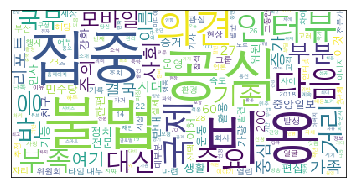

In [82]:
from wordcloud import  WordCloud
import matplotlib.pyplot as plt

fontPath = "Libray/Fonts/AppleGothic.ttf"
wc = WordCloud(font_path=fontPath, background_color="white")

wc.generate_from_frequencies(cluster_voc[1].to_dict())
plt.imshow(wc)
plt.xticks([])
plt.yticks([])
plt.show()